# Trees of Paris 
objective + summary + justify every action

# Library used

In [1]:
import folium as folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Retrieving data from the csv file

In [2]:
filename = "./resources/p2-arbres-fr.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=';')
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [4]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


With the functions info and describe, we learn more about our data.

## Useful values

In [5]:
# Returns tree number
def getTreeNumber(dataF):
    count = len(dataF)
    print("Total number of trees:", count, '\n')
    return count


# Returns data frame columns
def getColumns(dataF):
    return dataF.columns.values


# Prints data frame's columns
def printColumns(col):
    print(col)
    print(len(col))

columns = getColumns(data)
row_count = getTreeNumber(data)
PARIS_LOCATION = (48.856614, 2.3522219)

Total number of trees: 200137 



# Boxplots

## Finding maximum circumference and height

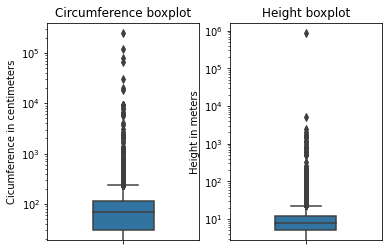

In [6]:
fig, axes = plt.subplots(1, 2)
circum_boxplot = sns.boxplot(y=data['circonference_cm'], ax=axes[0],  width= 0.4)
circum_boxplot.set_yscale('log')
circum_boxplot.set_title('Circumference boxplot')
circum_boxplot.set_ylabel('Cicumference in centimeters')
# plt.show()

height_boxplot = sns.boxplot(y=data["hauteur_m"], ax=axes[1],  width= 0.4)
height_boxplot.set_yscale('log')
height_boxplot.set_title('Height boxplot')
height_boxplot.set_ylabel('Height in meters')
plt.show()

## Showing how much data is missing on each column

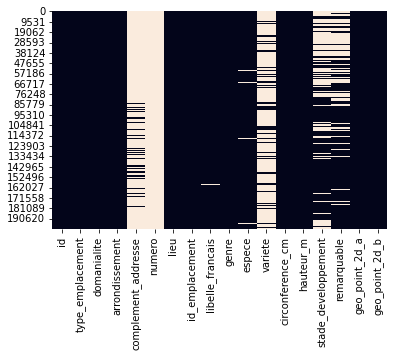

In [7]:
# missing_values = msno.bar(data)
sns.heatmap(data.isnull(), cbar=False)
plt.show()

Thanks to the heatmap, we find out which columns are empty or are missing too many values for our work. 

# Data cleanup

We remove columns we won't be using for our study, either because they aren't useful or because they aren't filled with enough data.
We also remove lines that weren't filled correctly, for example if the tree circumference or height is equal to 0, or if the tree is taller or wider than the biggest tree known in Paris.

In [8]:
# Removing unwanted columns from data frame
def cleaningColumns(dataF):
    dataF.drop(['type_emplacement', 'domanialite', 'complement_addresse','numero'], axis=1, inplace=True)
    dataF.drop(['id_emplacement','variete', 'remarquable'], axis=1, inplace=True)
    return dataF

# Removing unwanted lines from data frame
def cleaningRows(dataF):
    dataF.drop(dataF.index[(dataF["circonference_cm"] <= 0)], axis=0, inplace=True)
    dataF.drop(dataF.index[(dataF["hauteur_m"] <= 0)], axis=0, inplace=True)
    # biggest circumference paris tree 8m -> 800 cm
    dataF.drop(dataF.index[(dataF["circonference_cm"] > 900)], axis=0, inplace=True)
    # tallest paris tree 35 m -> 3500 cm
    dataF.drop(dataF.index[(dataF["hauteur_m"] > 40)], axis=0, inplace=True)
    return dataF

In [9]:
# Data clean up
data = cleaningColumns(data)
data = cleaningRows(data)
data = data.drop_duplicates()

## Replacing NaN values

In [10]:
circum_median = data['circonference_cm'].median()
height_median = data['hauteur_m'].median()

data['circonference_cm'] = data['circonference_cm'].fillna(circum_median)
data['hauteur_m'] = data['hauteur_m'].fillna(height_median)

We replace the missing values in the circumference and height columns with their corresponding median.

# Data after cleanup

In [11]:
# Save cleaned up csv
data.to_csv('./resources/cleanedDF.csv', encoding='utf-8', sep=';', index=False)
data.reset_index(drop=True)

,id,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,geo_point_2d_a,geo_point_2d_b
0,99874,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,NaN,48.857620,2.320962
1,99875,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,A,48.857656,2.321031
2,99876,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,A,48.857705,2.321061
3,99877,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,A,48.857722,2.321006
4,99881,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,Platanus,x hispanica,260,17,NaN,48.876722,2.280222
...,...,...,...,...,...,...,...,...,...,...,...
159998,2023464,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848074,2.409116
159999,2023465,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848226,2.409147
160000,2023466,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848379,2.409179
160001,2023467,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,NaN,48.848533,2.409209


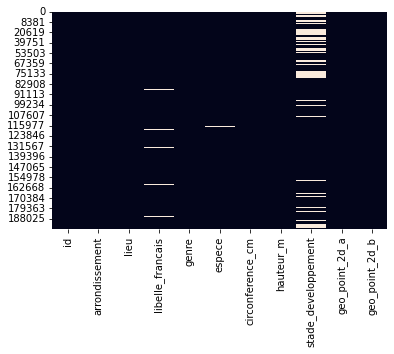

In [12]:
# missing_values = msno.bar(data)
sns.heatmap(data.isnull(), cbar=False)
plt.show()

### Boxplots after cleanup

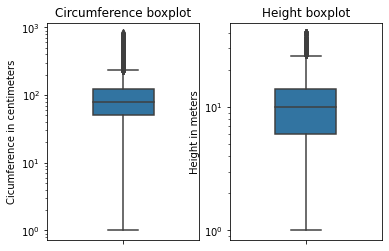

In [75]:
fig, axes = plt.subplots(1, 2)
circum_boxplot = sns.boxplot(y=data['circonference_cm'], ax=axes[0],  width= 0.4)
circum_boxplot.set_yscale('log')
circum_boxplot.set_title('Circumference boxplot')
circum_boxplot.set_ylabel('Cicumference in centimeters')

height_boxplot = sns.boxplot(y=data["hauteur_m"], ax=axes[1],  width= 0.4)
height_boxplot.set_yscale('log')
height_boxplot.set_title('Height boxplot')
height_boxplot.set_ylabel('Height in meters')
plt.show()

# Work on the data

## Species percentage in Paris

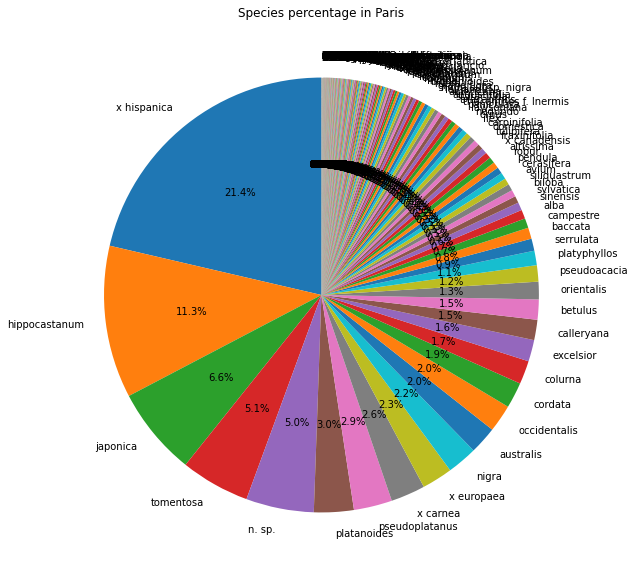

In [20]:
# Top 10 most present species in Paris
species_group = data.groupby(['espece']).size().sort_values(ascending=False)
species_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Species percentage in Paris')
plt.ylabel('')
plt.show()

## Ten most present species

In [21]:
top_species_df = species_group.head(10).reset_index(name='count')
top_species_list = []
species_to_delete = []

print("Ten most present species :")
for index, row in top_species_df.iterrows():
    specie = top_species_df['espece'][index]
    top_species_list.append(specie)
    print(specie)

for index, val in species_group.iteritems():
    if index not in top_species_list:
        species_to_delete.append(index)

Ten most present species :
x hispanica
hippocastanum
japonica
tomentosa
n. sp.
platanoides
pseudoplatanus
x carnea
x europaea
nigra


## Ten most present species percentage for each district

In [22]:
species_district_df = data.groupby(['arrondissement', 'espece'], dropna=True).size().reset_index(name="count")

# Removing species which aren't in top_species_list
for specie in species_to_delete:
    species_district_df.drop(species_district_df.index[(species_district_df["espece"] == specie)], axis=0, inplace=True)

"""
for i in range(len(species_district_df)):
    district = species_district_df["arrondissement"][i]
    specie = species_district_df["espece"][i]
    count = species_district_df["count"][i]
    print(district, ":", count, specie)
"""
species_district_df

,arrondissement,espece,count
16,BOIS DE BOULOGNE,hippocastanum,958
17,BOIS DE BOULOGNE,japonica,8
21,BOIS DE BOULOGNE,n. sp.,8
22,BOIS DE BOULOGNE,nigra,1
29,BOIS DE BOULOGNE,platanoides,45
...,...,...,...
2933,VAL-DE-MARNE,platanoides,324
2937,VAL-DE-MARNE,pseudoplatanus,291
2950,VAL-DE-MARNE,tomentosa,6
2955,VAL-DE-MARNE,x europaea,108


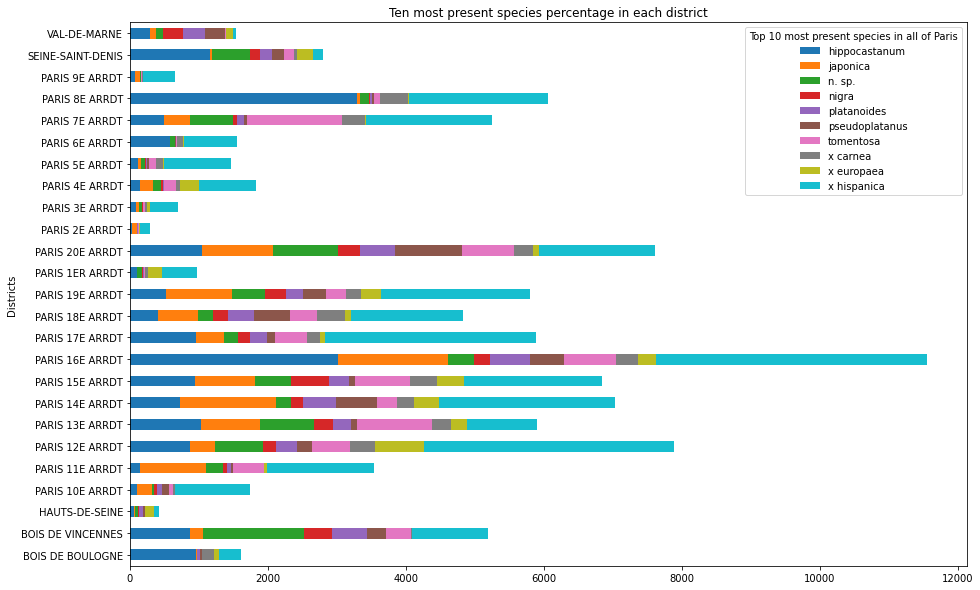

In [23]:
# reshape the dataframe
species_district_dfpivot = species_district_df.pivot(index=['arrondissement'], columns=['espece'], values='count')

# plot stacked bars
species_district_dfpivot.plot(kind='barh', stacked=True, rot=0, figsize=(15, 10),
                              xlabel='Districts', ylabel='Species frequency', title='Ten most present species percentage in each district')
plt.legend(title = "Top 10 most present species in all of Paris")
plt.show()

## Tree number percentage per district

### Districts' geolocalisation

In [14]:
first_of_each_district_df = data.groupby(['arrondissement']).nth(0).reset_index()
first_of_each_district_df.drop(['id','lieu', 'stade_developpement', 'circonference_cm', 'hauteur_m', 'genre', 'espece', 'libelle_francais'], axis=1, inplace=True)

district_geoloc = {}
for i in range(len(first_of_each_district_df)):
    loc_a_index = first_of_each_district_df["geo_point_2d_a"][i]
    loc_b_index =  first_of_each_district_df["geo_point_2d_b"][i]
    index = first_of_each_district_df["arrondissement"][i]
    coordinates = (loc_a_index, loc_b_index)
    district_geoloc[index] = coordinates
    
first_of_each_district_df

,arrondissement,geo_point_2d_a,geo_point_2d_b
0,BOIS DE BOULOGNE,48.857614,2.262362
1,BOIS DE VINCENNES,48.841751,2.449273
2,HAUTS-DE-SEINE,48.804707,2.310855
3,PARIS 10E ARRDT,48.878544,2.368362
4,PARIS 11E ARRDT,48.864818,2.381492
5,PARIS 12E ARRDT,48.835428,2.380136
6,PARIS 13E ARRDT,48.821805,2.376479
7,PARIS 14E ARRDT,48.821643,2.340703
8,PARIS 15E ARRDT,48.831192,2.299643
9,PARIS 16E ARRDT,48.876722,2.280222


### District surface

In [15]:
# Surface in km2
surface_dict = {
                'BOIS DE BOULOGNE'   : 8.46,
                'BOIS DE VINCENNES'  : 9.95,
                'HAUTS-DE-SEINE'	 : 176,
                'PARIS 10E ARRDT'	 : 2.89,
                'PARIS 11E ARRDT'	 : 3.67,
                'PARIS 12E ARRDT'	 : 16.32,
                'PARIS 13E ARRDT'	 : 7.15,
                'PARIS 14E ARRDT'	 : 5.64,
                'PARIS 15E ARRDT'	 : 8.48,
                'PARIS 16E ARRDT'	 : 7.91,
                'PARIS 17E ARRDT'	 : 5.67,
                'PARIS 18E ARRDT'	 : 6.01,
                'PARIS 19E ARRDT'	 : 6.79,
                'PARIS 1ER ARRDT'	 : 1.83,
                'PARIS 20E ARRDT'	 : 5.98,
                'PARIS 2E ARRDT' 	 : 0.99,
                'PARIS 3E ARRDT' 	 : 1.17,
                'PARIS 4E ARRDT' 	 : 1.60,
                'PARIS 5E ARRDT' 	 : 2.54,
                'PARIS 6E ARRDT' 	 : 2.15,
                'PARIS 7E ARRDT' 	 : 4.09,
                'PARIS 8E ARRDT' 	 : 3.88,
                'PARIS 9E ARRDT' 	 : 2.18,
                'SEINE-SAINT-DENIS'  : 236,
                'VAL-DE-MARNE'       : 245,
                }

### Drawing on map

In [16]:
# Tree number per district
numb_per_district = data.groupby(['arrondissement']).size()

# Creating map
m = folium.Map(location=[48.856614, 2.3522219], width=750, height=500)

# Placing markers for each district on the map
for index, value in numb_per_district.items():
    if index in district_geoloc:
        localisation = district_geoloc[index]
        density = value / surface_dict[index] 
        text = str(value) + " trees are planted in " + index + '. \n ---\nDensity: ' + str(int(density)) +\
        ' trees per km² - District\'s surface = ' + str(surface_dict[index]) + ' km²'
        marker = folium.Circle(
                    location=localisation, 
                    radius=value/10, 
                    fill=True,
                    popup=text
                    )
        marker.add_to(m)

# Printing
m

## Tree number percentage per place

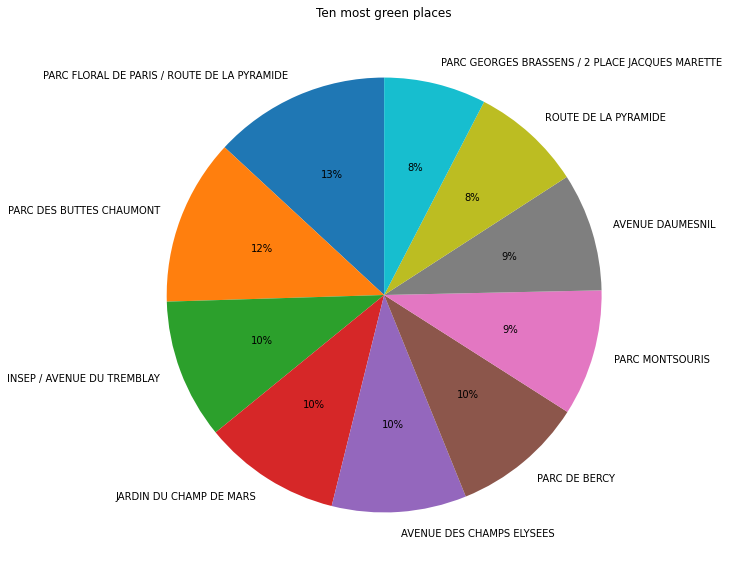

In [17]:
# Tree number percentage per place
place_group = data.groupby(['lieu']).size().sort_values(ascending=False)
place_group.head(10).plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%.0f%%')

plt.title('Ten most green places')
plt.ylabel('')
plt.show()

# Height, circumference and development stage scatterplot

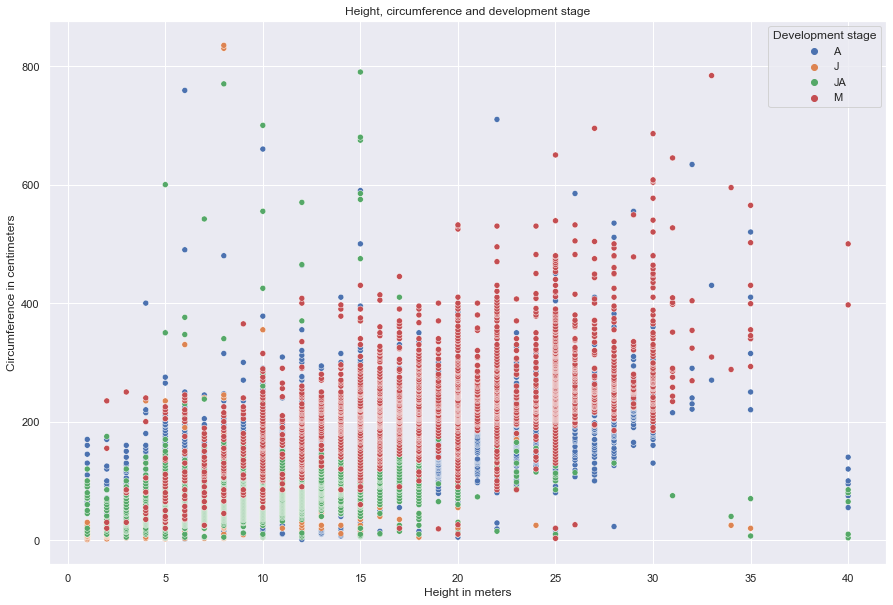

In [18]:
scatter = data.groupby(['stade_developpement', 'hauteur_m', 'circonference_cm'], dropna=True)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.scatterplot(data=scatter.size(), 
                     x='hauteur_m', 
                     y='circonference_cm', 
                     hue='stade_developpement')
ax.set(xlabel='Height in meters',
       ylabel='Circumference in centimeters',
       title='Height, circumference and development stage')
plt.legend(loc='upper right', title='Development stage')
plt.show()

## Trees' height and circumference and their development stage

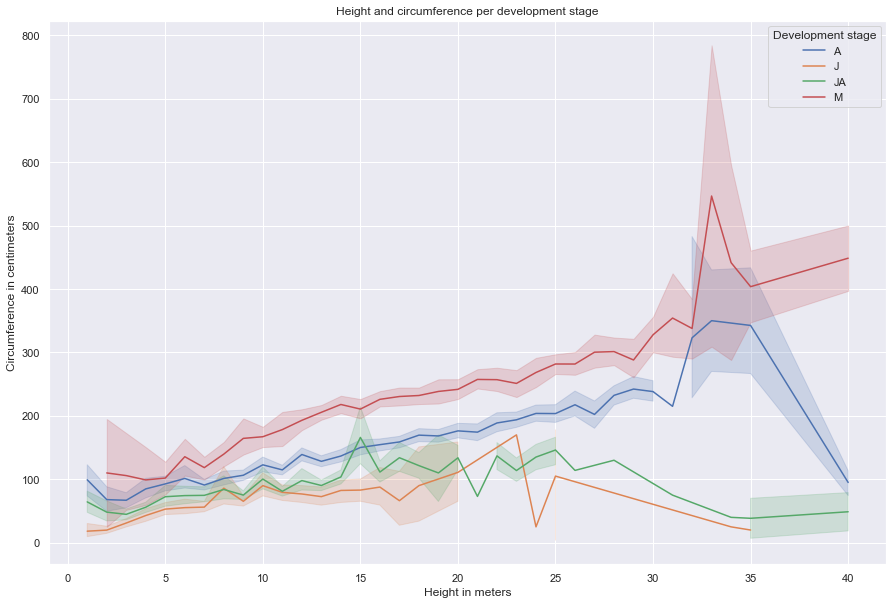

In [19]:
ax = sns.lineplot(data=scatter.size(),
             x='hauteur_m', 
             y='circonference_cm', 
             hue='stade_developpement')
ax.set(xlabel='Height in meters',
       ylabel='Circumference in centimeters',
       title='Height and circumference per development stage')
plt.legend(loc='upper right', title='Development stage')
plt.show()

## Height and circumference average per development stage

C:\Users\tradl\AppData\Local\Temp/ipykernel_4912/3594137420.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub = data.groupby(['stade_developpement'], dropna=True)['hauteur_m', 'circonference_cm'].mean().reset_index()


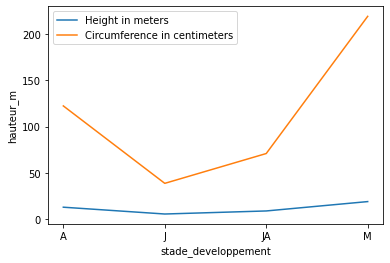

In [90]:
# fig,ax = plt.subplots()
sub = data.groupby(['stade_developpement'], dropna=True)['hauteur_m', 'circonference_cm'].mean().reset_index()

ax1 = sns.lineplot(data=sub,
                  x='stade_developpement',
                  y='hauteur_m',
                  label='Height in meters')

ax2 = sns.lineplot(data=sub,
                  x='stade_developpement',
                  y='circonference_cm',
                  label='Circumference in centimeters')

ax.set(xlabel='Development stage',
       ylabel = 'Height / Circumference average',
       title='Height and circumference average per development stage')
"""
h_c_dev_hist = sns.histplot(data=sub,
                            x='stade_developpement',
                            y=['circonference_cm', 'hauteur_m'],
                            multiple="stack"
                           )
"""
plt.show()

## Development stage distribution among districts

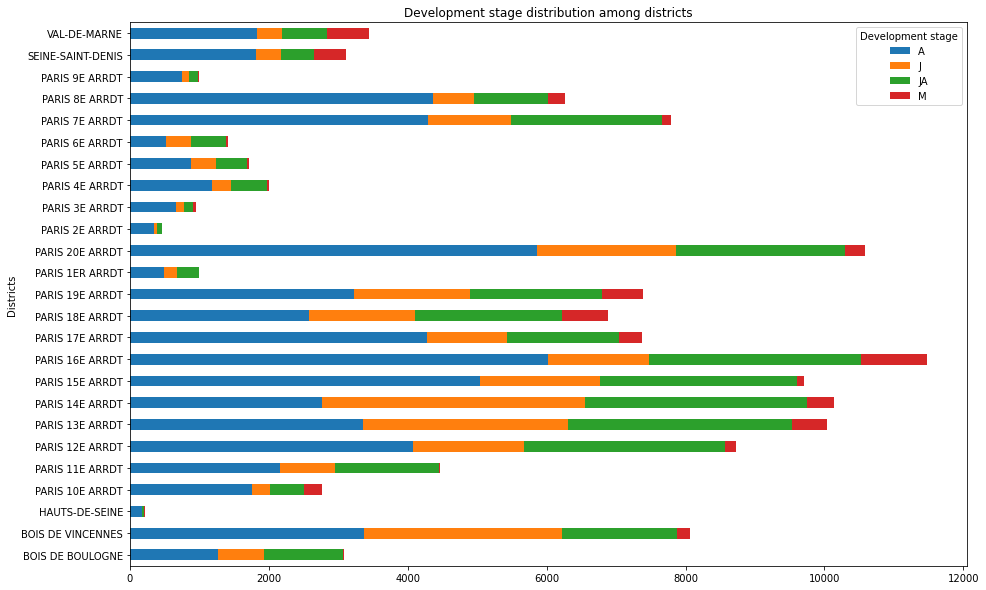

In [77]:
height_circum_mean = data.groupby(['arrondissement', 'stade_developpement']).size().reset_index(name="count")
# reshape the dataframe
height_circum_pivot = height_circum_mean.pivot(index=['arrondissement'], columns=['stade_developpement'], values='count')

# plot stacked bars
height_circum_pivot.plot(kind='barh', stacked=True, rot=0, figsize=(15, 10),
                              xlabel='Districts', ylabel='Development stage', title='Development stage distribution among districts')
plt.legend(title = 'Development stage')
plt.show()

## Average height per district

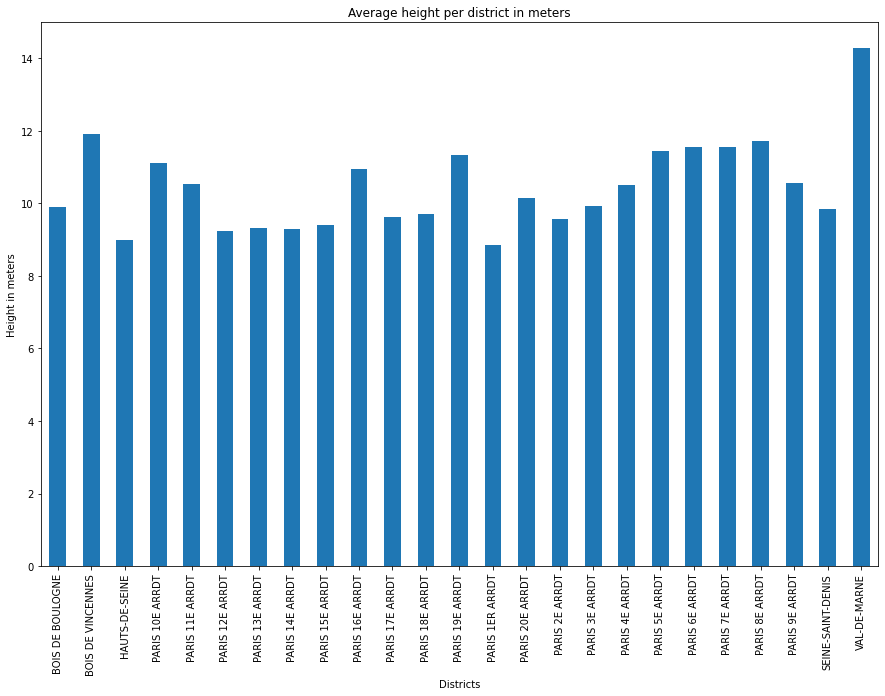

In [78]:
# Average height per arrondissement
height_mean = data.groupby(['arrondissement'])['hauteur_m'].mean().reset_index().plot(x='arrondissement',
                                                                                      y='hauteur_m',
                                                                                      kind='bar', 
                                                                                      subplots=True,
                                                                                      figsize=(15, 10),
                                                                                      legend=None)
plt.title('Average height per district in meters')
plt.xlabel('Districts')
plt.ylabel('Height in meters')
plt.show()

## Average circumference per district

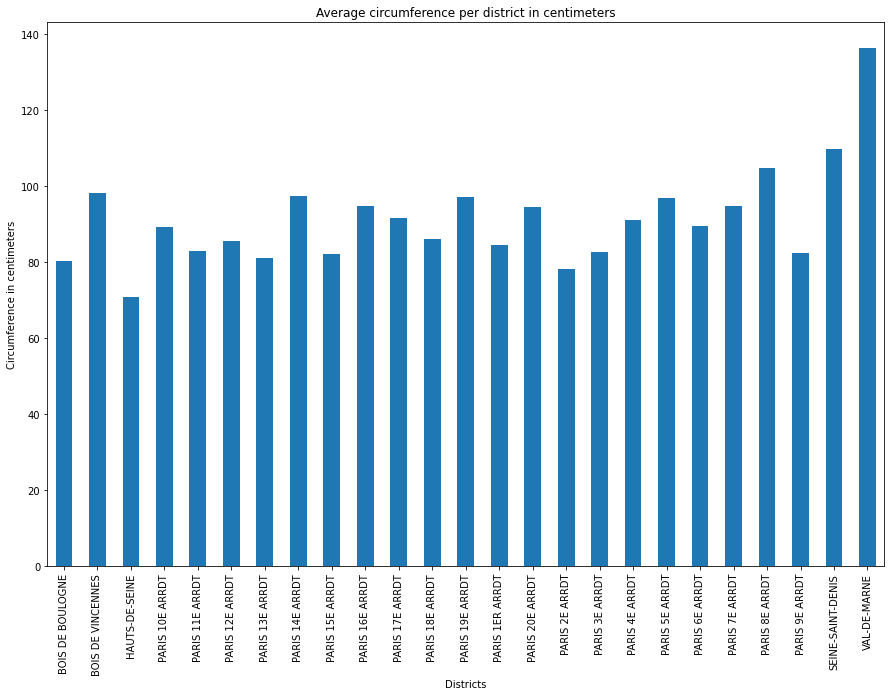

In [79]:
# Circumference average per arrondissement
circum_mean = data.groupby(['arrondissement'])['circonference_cm'].mean().reset_index().plot(kind='bar',
                                                                                             x='arrondissement',
                                                                                             y='circonference_cm',
                                                                                             subplots=True,
                                                                                             figsize=(15, 10),
                                                                                             legend=None)
plt.title('Average circumference per district in centimeters')
plt.xlabel('Districts')
plt.ylabel('Circumference in centimeters')
plt.show()

conclusion